datetime64[ns, UTC]
Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price day ahead', 'price actual', 'temp_0', 'temp_min_0', 'temp_max_0',
       'pressure_0', 'humidity_0', 'wind_speed_0', 'wind_deg_0', 'rain_1h_0',
       'clouds_all_0', 'weather_id_0', 'temp_1', 'temp_min_1', 'temp_max_1',
       'pressure_1', 'humidity_1', 'wind_speed_1', 'wind_deg_1', 'rain_1h_1',
       'snow_3h_1', 'clouds_all_1', 'weather_id_1', 'temp_2', 'temp_min_2',
       'temp_max_2', 'pressure_2', 'humidity_2', 'wind_speed_2', 'wind_deg_2',
       'rain_1h_2', 'sn

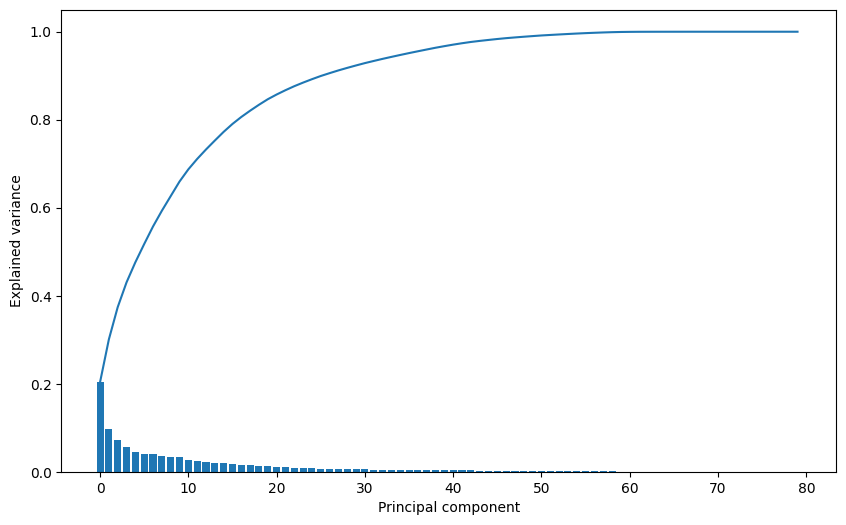

In [1]:
# %run preprocessing.ipynb

%run featuregeneration.ipynb


In [2]:

X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  # Reshape to (samples, timesteps * features)
X_val_reshaped = X_val.reshape(X_val.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)


### DecisionTreeRegressor

Decision Tree Validation MAE: 0.03192460668561736
Decision Tree Validation MSE: 0.0018553965905933833
Decision Tree Validation RMSE: 0.04307431474316664
Decision Tree Validation R^2: 0.8899537420976555
Decision Tree Test MAE: 0.026721970875896735
Decision Tree Test MSE: 0.0013923688402620992
Decision Tree Test RMSE: 0.03731445886331596
Decision Tree Test R^2: 0.8918355391515757


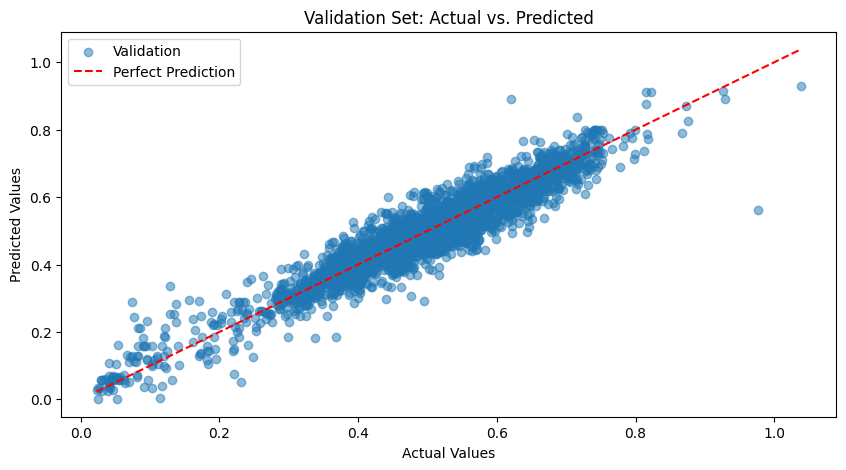

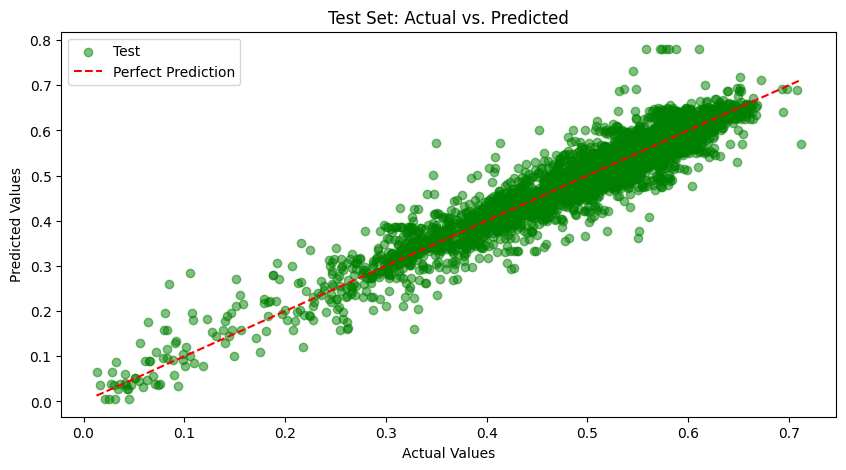

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_reshaped, y_train)

# Validation and Test Predictions
y_pred_val_dt = dt_model.predict(X_val_reshaped)
y_pred_test_dt = dt_model.predict(X_test_reshaped)

# Validation and Test Scores
print("Decision Tree Validation MAE:", mean_absolute_error(y_val, y_pred_val_dt))
print("Decision Tree Validation MSE:", mean_squared_error(y_val, y_pred_val_dt))
print("Decision Tree Validation RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_val_dt)))
print("Decision Tree Validation R^2:", r2_score(y_val, y_pred_val_dt))

# Test Scores
print("Decision Tree Test MAE:", mean_absolute_error(y_test, y_pred_test_dt))
print("Decision Tree Test MSE:", mean_squared_error(y_test, y_pred_test_dt))
print("Decision Tree Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_dt)))
print("Decision Tree Test R^2:", r2_score(y_test, y_pred_test_dt))

import matplotlib.pyplot as plt

# Plot for validation set
plt.figure(figsize=(10, 5))
plt.scatter(y_val, y_pred_val_dt, alpha=0.5, label="Validation")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', label="Perfect Prediction")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Validation Set: Actual vs. Predicted")
plt.legend()
plt.show()

# Plot for test set
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_test_dt, alpha=0.5, color="green", label="Test")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Test Set: Actual vs. Predicted")
plt.legend()
plt.show()





### RandomForestRegressor

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)  # Reduced estimators for quicker runtime
rf_model.fit(X_train_reshaped, y_train)

# Validation and Test Predictions
y_pred_val_rf = rf_model.predict(X_val_reshaped)
y_pred_test_rf = rf_model.predict(X_test_reshaped)

# Validation Scores
print("Random Forest Validation MAE:", mean_absolute_error(y_val, y_pred_val_rf))
print("Random Forest Validation MSE:", mean_squared_error(y_val, y_pred_val_rf))
print("Random Forest Validation RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_val_rf)))
print("Random Forest Validation R^2:", r2_score(y_val, y_pred_val_rf))

# Test Scores
print("Random Forest Test MAE:", mean_absolute_error(y_test, y_pred_test_rf))
print("Random Forest Test MSE:", mean_squared_error(y_test, y_pred_test_rf))
print("Random Forest Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_rf)))
print("Random Forest Test R^2:", r2_score(y_test, y_pred_test_rf))

# Accuracy (R^2 Score on the test set)
print("Random Forest Test Accuracy (R^2):", rf_model.score(X_test_reshaped, y_test))


Random Forest Validation MAE: 0.021136423734898595
Random Forest Validation MSE: 0.0009321047327503878
Random Forest Validation RMSE: 0.03053039031441275
Random Forest Validation R^2: 0.9447155188641151
Random Forest Test MAE: 0.01606131383733495
Random Forest Test MSE: 0.0005053079947285029
Random Forest Test RMSE: 0.022479056802466223
Random Forest Test R^2: 0.9607457699197589
Random Forest Test Accuracy (R^2): 0.9607457699197589


### SVM with kernels

In [5]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the SVM model with scaling
svm_pipeline = Pipeline([('scaler', StandardScaler()), ('svr', SVR(kernel='rbf'))])
svm_pipeline.fit(X_train_reshaped, y_train)

# Validation and Test Predictions
y_pred_val_svm = svm_pipeline.predict(X_val_reshaped)
y_pred_test_svm = svm_pipeline.predict(X_test_reshaped)

# Validation Scores
print("SVM Validation MAE:", mean_absolute_error(y_val, y_pred_val_svm))
print("SVM Validation MSE:", mean_squared_error(y_val, y_pred_val_svm))
print("SVM Validation RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_val_svm)))
print("SVM Validation R^2:", r2_score(y_val, y_pred_val_svm))

# Test Scores
print("SVM Test MAE:", mean_absolute_error(y_test, y_pred_test_svm))
print("SVM Test MSE:", mean_squared_error(y_test, y_pred_test_svm))
print("SVM Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_svm)))
print("SVM Test R^2:", r2_score(y_test, y_pred_test_svm))

# Accuracy (R^2 Score on the test set)
print("SVM Test Accuracy (R^2):", svm_pipeline.score(X_test_reshaped, y_test))


SVM Validation MAE: 0.046034116344524624
SVM Validation MSE: 0.0036319992669186156
SVM Validation RMSE: 0.060266070611237094
SVM Validation R^2: 0.7845808653229088
SVM Test MAE: 0.03903999676270008
SVM Test MSE: 0.0024874627643826966
SVM Test RMSE: 0.04987447006618413
SVM Test R^2: 0.8067645145381602
SVM Test Accuracy (R^2): 0.8067645145381602


### Neural Network

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Define the neural network model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(train, epochs=50, validation_data=validation, callbacks=[early_stopping])

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions
predictions = model.predict(X_test)
predictions_inv = scaler_y.inverse_transform(predictions)

Epoch 1/50


/Users/birkstrandbjornaa/Documents/DatatekH24/it3212-data-driven-software/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


767/767 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0195 - val_loss: 0.0101
Epoch 2/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0075 - val_loss: 0.0056
Epoch 3/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 4/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 5/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 6/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 7/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 8/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 9/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 10/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 11/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0013 - val_loss: 9.5353e-04
Epoch 12/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9429e-04
Test Loss (MSE): 0.0004958349163644016
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error (MAE): 1.695178846921269
Mean Squared Error (MSE): 5.309455822437209
Root Mean Squared Error (RMSE): 2.3042256448614595
R^2 Score: 0.961481668573303


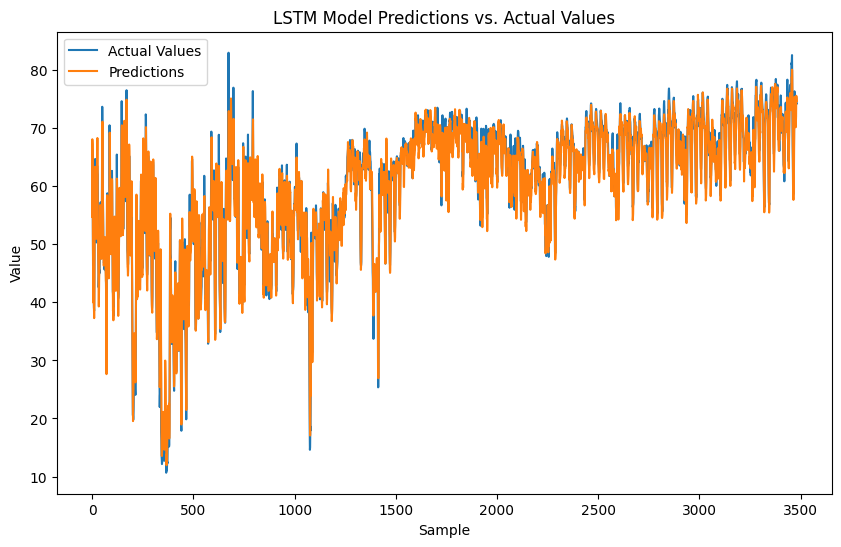

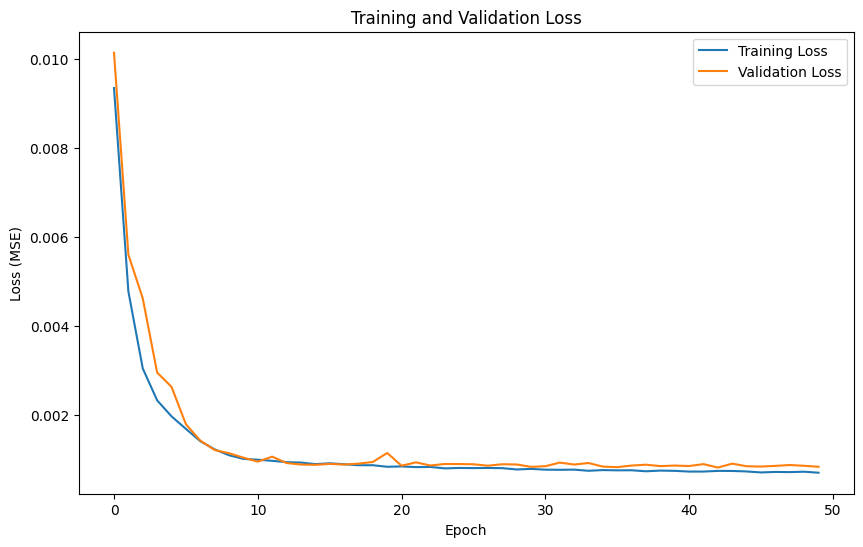

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate on test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {test_loss}')

# Make predictions and inverse transform if necessary
predictions = model.predict(X_test)
predictions_inv = scaler_y.inverse_transform(predictions)
y_test_inv = scaler_y.inverse_transform(y_test)  # Inverse transform actual values

# Calculate performance metrics
mae = mean_absolute_error(y_test_inv, predictions_inv)
mse = mean_squared_error(y_test_inv, predictions_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, predictions_inv)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual Values')
plt.plot(predictions_inv, label='Predictions')
plt.title('LSTM Model Predictions vs. Actual Values')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot training & validation loss history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


### Additive methods

13:27:09 - cmdstanpy - INFO - Chain [1] start processing
13:27:17 - cmdstanpy - INFO - Chain [1] done processing


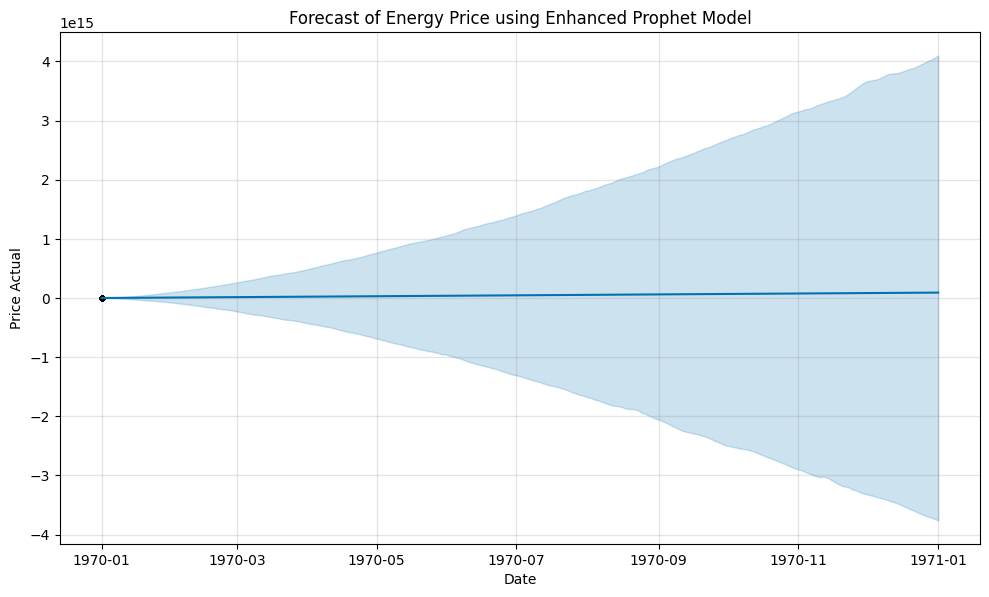

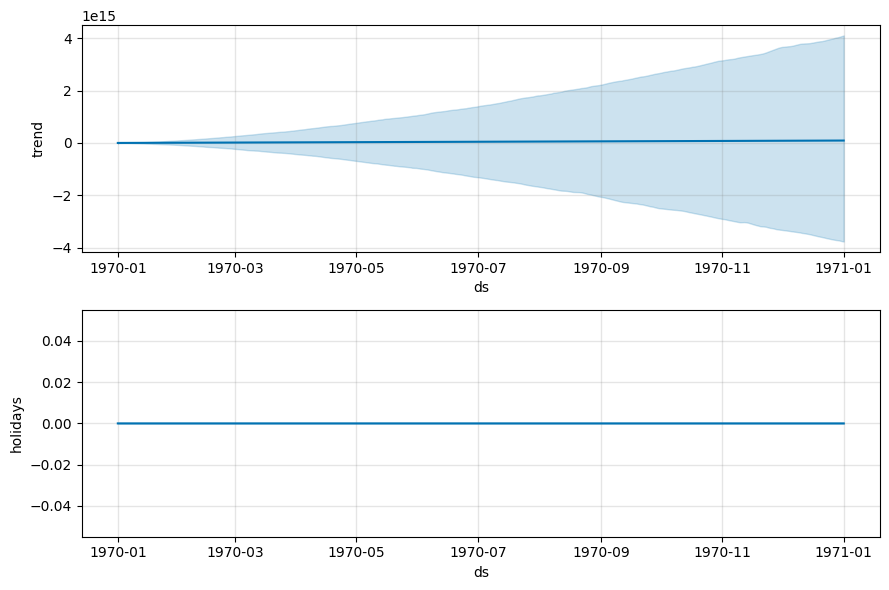

Mean Absolute Error (MAE): 7.984950169328052
Mean Squared Error (MSE): 107.63964395878261
Root Mean Squared Error (RMSE): 10.37495272079746
R^2 Score: 0.46647076990285063


ValueError: Less data than horizon.

In [10]:
from matplotlib import pyplot as plt
from prophet import Prophet
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming df_final has been preprocessed and loaded
# Reset the index to get 'time' as a column, and drop NaNs if necessary
df_prophet = df_final[['time', 'price actual']].rename(columns={'time': 'ds', 'price actual': 'y'})

# Remove timezone information from 'ds' column
df_prophet['ds'] = pd.to_datetime(df_prophet['ds']).dt.tz_localize(None)

# Initialize the Prophet model with custom parameters
model = Prophet(
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.05,
    seasonality_prior_scale=10.0,
    holidays=None  # Placeholder, we'll add holidays later
)

# Adding external regressors for temperature and demand
model.add_regressor('temperature')
model.add_regressor('demand')

# Define custom seasonalities (if needed)
model.add_seasonality(name='weekly', period=7, fourier_order=10)

# Define holidays (for the US as an example)
from prophet.make_holidays import make_holidays_df
holidays = make_holidays_df(year_list=[2022, 2023], country='US')
model = Prophet(holidays=holidays)

# Drop any rows with NaN values to avoid errors
df_prophet = df_prophet.dropna()

# Fit the model
model.fit(df_prophet)

# Make a future DataFrame for predictions
future = model.make_future_dataframe(periods=365, freq='D')
future['temperature'] = ... # Fill in future values or interpolate based on historical data
future['demand'] = ...      # Same as above

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)
plt.title("Forecast of Energy Price using Enhanced Prophet Model")
plt.xlabel("Date")
plt.ylabel("Price Actual")
plt.show()

# Plot the trend, seasonality, and other components
fig2 = model.plot_components(forecast)
plt.show()

# Calculate performance metrics on historical data
forecast_history = forecast[forecast['ds'].isin(df_prophet['ds'])]
y_pred = forecast_history['yhat'].values
y_true = df_prophet['y'].values

# Calculate performance metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')

# Perform cross-validation for further performance evaluation
from prophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(model, initial='48 days', period='24 days', horizon='48 days')
df_p = performance_metrics(df_cv)
print(df_p.head())
